In [ ]:
import numpy as np
import pandas as pd
import re, string

In [ ]:
df = pd.read_csv('tweet4000.csv')

In [ ]:
df.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,quoted_status.place.id,quoted_status.place.url,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates
3995,Sun Nov 14 07:00:30 +0000 2021,1459778249848811520,1459778249848811520,3. Berdasarkan kajian kritis terhadap Permendi...,False,"[0, 189]","<a href=""http://twitter.com/download/android"" ...",1.459778e+18,1.459778e+18,6.835056e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3996,Sun Nov 14 07:00:30 +0000 2021,1459778247810420740,1459778247810420740,2. Permendikbud Ristek no 30/2021 ini bertujua...,False,"[0, 246]","<a href=""http://twitter.com/download/android"" ...",1.459778e+18,1.459778e+18,6.835056e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3997,Sun Nov 14 07:00:00 +0000 2021,1459778122027450370,1459778122027450370,@_haye_ @fajarnugros dengan adanya permendikbu...,False,"[21, 108]","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.459533e+18,1.459533e+18,7.535539e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3998,Sun Nov 14 06:58:39 +0000 2021,1459777782754398211,1459777782754398211,Izin Pak @Hilmi28 Permendikbud Pencegahan Kek...,False,"[0, 212]","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3999,Sun Nov 14 06:58:15 +0000 2021,1459777682191699969,1459777682191699969,@b41m_b14ck Nggak kebayang klo Permendikbud 30...,False,"[12, 108]","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.459771e+18,1.459771e+18,1.344535e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tweet_df = df[['full_text']]
tweet_df = tweet_df.rename(columns={'full_text' : 'Tweets'})
tweet_df.head()

,Tweets
0,@vektorkreatif @criedterion Bukan nya konteksn...
1,@vektorkreatif @criedterion @IbnuTasrip Tagarn...
2,"""tolak permendikbud"" katanya. https://t.co/dxF..."
3,@fashihatulaziza Berikut alasan disahkannya Pe...
4,KPI Somasi Nadiem Terkait Permendikbud Pencega...


In [ ]:
#Clean text

#Membuat fungsi membersihkan tweet
def cleanTxt(text) :
  text = text.lower()
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  text = re.sub(r'^\s+', '', text)
  text = re.sub(r'\w*\d\w*', '',text).strip()
  return text

In [ ]:
stopwords = pd.read_csv('kamus/stopword.txt', header=None)
stopwords[0].values.tolist()

In [ ]:
def remove_stopwords(data):
  data['review without stopwords'] = data['Tweets'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stopwords)]))
  return data

In [ ]:
data_without_stopwords = remove_stopwords(tweet_df)
data_without_stopwords

In [ ]:
def hapus_katadouble(s): 
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)


In [ ]:
import nltk

In [ ]:
tweet_df['Tweets'] = tweet_df['Tweets'].apply(cleanTxt)
tweet_df

,Tweets
0,bukan nya konteksnya kekerasan seksual yah klo...
1,tagarnya aja tolak permendikbud ada gt mereka ...
2,tolak permendikbud katanya
3,berikut alasan disahkannya permendikbud penang...
4,kpi somasi nadiem terkait permendikbud pencega...
...,...
3995,berdasarkan kajian kritis terhadap permendikbu...
3996,permendikbud ristek no ini bertujuan sebagai ...
3997,dengan adanya permendikbud legal jadi red doo...
3998,izin pak permendikbud pencegahan kekerasan s...


In [ ]:
for i in tweet_df['Tweets'][:10] :
    print(i)
    print('')

bukan nya konteksnya kekerasan seksual yah klo kekerasan memang tanpa persetujuan namun jika konteks nya tindakan asusila rasanya baru pas untuk perimbangan sehingga permendikbud terkait kekerasan rasanya sdh pas namun perlu diperkuat dengan yang tindakan asusila nya

tagarnya aja tolak permendikbud ada gt mereka yg naikan tagar itu buat revisi tagar

tolak permendikbud katanya

berikut alasan disahkannya permendikbud penanganan kekerasan seksual

kpi somasi nadiem terkait permendikbud pencegahan dan penanganan kekerasan seksual terkiniid terkinidotid makassarterkiniid makassarterkinidotid

permendikbud   bisa spill kasus ini

suruh nonton mata najwa edisi permendikbud ajaaa

kalau memang niat sebenernya dr dulu bs ditindak dengan psl  tojng sampe krn mo lolosin permendikbud sj macam urgen lagian sanksinya ringandiilangin kalimat atas persetujuan korban boleh lahdan hal ini sebetulnya nggak rame kalau teges ngatur hub pria wanita

sebuah utas membahas permendikbud  tahun

mentari w dia

In [ ]:
#tweet_df.to_csv('tweets.csv', index=False)

In [ ]:
tweet_text = ' '.join(tweet_df.Tweets.to_numpy().tolist())

In [ ]:
tweet_text

'bukan nya konteksnya kekerasan seksual yah klo kekerasan memang tanpa persetujuan namun jika konteks nya tindakan asusila rasanya baru pas untuk perimbangan sehingga permendikbud terkait kekerasan rasanya sdh pas namun perlu diperkuat dengan yang tindakan asusila nya tagarnya aja tolak permendikbud ada gt mereka yg naikan tagar itu buat revisi tagar tolak permendikbud katanya berikut alasan disahkannya permendikbud penanganan kekerasan seksual kpi somasi nadiem terkait permendikbud pencegahan dan penanganan kekerasan seksual terkiniid terkinidotid makassarterkiniid makassarterkinidotid permendikbud   bisa spill kasus ini suruh nonton mata najwa edisi permendikbud ajaaa kalau memang niat sebenernya dr dulu bs ditindak dengan psl  tojng sampe krn mo lolosin permendikbud sj macam urgen lagian sanksinya ringandiilangin kalimat atas persetujuan korban boleh lahdan hal ini sebetulnya nggak rame kalau teges ngatur hub pria wanita sebuah utas membahas permendikbud  tahun mentari w dian savitr

In [ ]:
import re,string
import nltk
import csv
import numpy as np 
# from stemmer import MyStemmer

class Preproses:
	KATA_DASAR  = []
	DATA_KBBI 	= []

	def __init__(self):
		global KATA_DASAR
		global DATA_KBBI
		KATA_DASAR 	= [line.strip('\n')for line in open('kamus/rootword.txt')]
		DATA_KBBI	= [kamus.strip('\n').strip('\r') for kamus in open('kamus/kbba.txt')]

	def tokenize(self, tweet): 
		# this is very poor implementation of word tokenizer
		# try to rich tokenizer below using your best tools
		# token = nltk.word_tokenize(tweet)
		token = tweet.split(' ')
		return token

	def kbbi(self, token): 
		global DATA_KBBI

		#ubah list menjadi dictionary 
		dic={}
		for i in DATA_KBBI: 
			(key,val)=i.split('\t')
			dic[str(key)]=val

		#kbbi cocokan 
		final_string = ' '.join(str(dic.get(word, word)) for word in token).split()
		return final_string

	def normalize_token(self, _tokens):
		tokens = self.kbbi(_tokens)
		return tokens
    def stopwordDel(token):
        stopword=[word.strip('\n') for word in open('kamus/stopword.txt')] 
        noise=[noise.strip('\n').strip('\r') for noise in open('kamus/noise.txt')]
        tampung=[]
        for i in range(0,len(token)): 
            if token[i] not in stopword and token[i] not in noise: 
                tampung.append(token[i])
        return tampung
	def preprocess(self, tweet):

		def hapus_tanda(tweet): 
			tanda_baca = set(string.punctuation)
			tweet = ''.join(ch for ch in tweet if ch not in tanda_baca)
			return tweet

		def hapus_katadouble(s): 
		    #look for 2 or more repetitions of character and replace with the character itself
		    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
		    return pattern.sub(r"\1\1", s)

		tweet=tweet.lower()
		tweet = re.sub(r'\\u\w\w\w\w', '', tweet)
		tweet=re.sub(r'http\S+','',tweet)
		#hapus @username
		tweet=re.sub('@[^\s]+','',tweet)
		#hapus #tagger 
		tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
		#hapus tanda baca
		tweet=hapus_tanda(tweet)
		#hapus angka dan angka yang berada dalam string 
		tweet=re.sub(r'\w*\d\w*', '',tweet).strip()
		#hapus repetisi karakter 
		tweet=hapus_katadouble(tweet)
		return tweet

	def prep(self, sent):
		return self.normalize_token(self.tokenize(self.preprocess(sent)))



In [ ]:
twr = Preproses()

In [ ]:
tweet_text

'bukan nya konteksnya kekerasan seksual yah klo kekerasan memang tanpa persetujuan namun jika konteks nya tindakan asusila rasanya baru pas untuk perimbangan sehingga permendikbud terkait kekerasan rasanya sdh pas namun perlu diperkuat dengan yang tindakan asusila nya tagarnya aja tolak permendikbud ada gt mereka yg naikan tagar itu buat revisi tagar tolak permendikbud katanya berikut alasan disahkannya permendikbud penanganan kekerasan seksual kpi somasi nadiem terkait permendikbud pencegahan dan penanganan kekerasan seksual terkiniid terkinidotid makassarterkiniid makassarterkinidotid permendikbud   bisa spill kasus ini suruh nonton mata najwa edisi permendikbud ajaaa kalau memang niat sebenernya dr dulu bs ditindak dengan psl  tojng sampe krn mo lolosin permendikbud sj macam urgen lagian sanksinya ringandiilangin kalimat atas persetujuan korban boleh lahdan hal ini sebetulnya nggak rame kalau teges ngatur hub pria wanita sebuah utas membahas permendikbud  tahun mentari w dian savitr

In [ ]:
tweet_prep = twr.preprocess(tweet_text)
tweet_prep = twr.kbbi(tweet_prep)
#tweet_prep = twr.normalize_token(tweet_prep)

In [ ]:
len(tweet_prep)

590725

In [ ]:
tweet_prep

['b',
 'kamu',
 'ke',
 'a',
 'dan',
 'dan',
 'ya',
 'a',
 'ke',
 'o',
 'dan',
 't',
 'e',
 'ke',
 's',
 'dan',
 'ya',
 'a',
 'ke',
 'e',
 'ke',
 'e',
 'r',
 'a',
 's',
 'a',
 'dan',
 's',
 'e',
 'ke',
 's',
 'kamu',
 'a',
 'l',
 'ya',
 'a',
 'h',
 'ke',
 'l',
 'o',
 'ke',
 'e',
 'ke',
 'e',
 'r',
 'a',
 's',
 'a',
 'dan',
 'm',
 'e',
 'm',
 'a',
 'dan',
 'g',
 't',
 'a',
 'dan',
 'p',
 'a',
 'p',
 'e',
 'r',
 's',
 'e',
 't',
 'kamu',
 'j',
 'kamu',
 'a',
 'dan',
 'dan',
 'a',
 'm',
 'kamu',
 'dan',
 'j',
 'i',
 'ke',
 'a',
 'ke',
 'o',
 'dan',
 't',
 'e',
 'ke',
 's',
 'dan',
 'ya',
 'a',
 't',
 'i',
 'dan',
 'di',
 'a',
 'ke',
 'a',
 'dan',
 'a',
 's',
 'kamu',
 's',
 'i',
 'l',
 'a',
 'r',
 'a',
 's',
 'a',
 'dan',
 'ya',
 'a',
 'b',
 'a',
 'r',
 'kamu',
 'p',
 'a',
 's',
 'kamu',
 'dan',
 't',
 'kamu',
 'ke',
 'p',
 'e',
 'r',
 'i',
 'm',
 'b',
 'a',
 'dan',
 'g',
 'a',
 'dan',
 's',
 'e',
 'h',
 'i',
 'dan',
 'g',
 'g',
 'a',
 'p',
 'e',
 'r',
 'm',
 'e',
 'dan',
 'di',
 'i',
 'ke

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
import csv

with open('kamus/stop-words-list-id.csv', newline='') as f:
    reader = csv.reader(f)
    stopword_id = list(reader)
    stopword_id = stopword_id[0]

In [ ]:
awankata = WordCloud(stopwords=stopword_id, background_color='#252559').generate(tweet_text)

stopword_id

In [ ]:
def show_word_cloud(cloud):
    plt.figure(figsize=(16,10))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

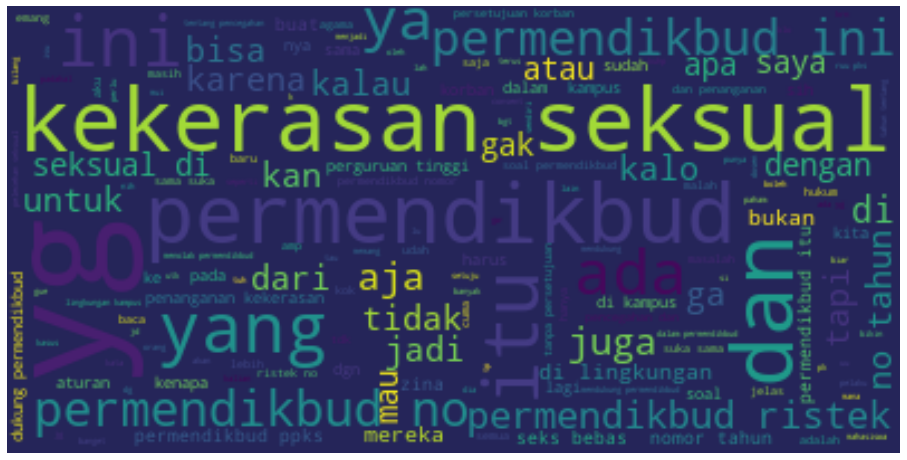

In [ ]:
show_word_cloud(awankata)